# TITANIC 

This Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not. 

In [117]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style("whitegrid")

import warnings
warnings.filterwarnings("ignore")


loading datasets

In [118]:
df=pd.read_csv("titanic.csv")

In [119]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [120]:
df.shape

(891, 12)

In [121]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [122]:
df.keys()

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [124]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [125]:
#fillin the null values
df['Age']=df['Age'].fillna(df['Age'].mean())

In [126]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [127]:
# Cabin: filling with unknown item "U"

df['Cabin']=df['Cabin'].fillna('U')

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


DATA CATEGORIZATION(one hot encoder)

In [129]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U,S


In [130]:
#pclass
pclass_df=pd.DataFrame()
pclass_df=pd.get_dummies(df['Pclass'],prefix='Pclass')
pclass_df.head()






,Pclass_1,Pclass_2,Pclass_3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1


In [131]:
df=pd.concat([df,pclass_df],axis=1)
df.drop('Pclass',axis=1,inplace=True)
df.head()





,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Pclass_1,Pclass_2,Pclass_3
0,1,0,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U,S,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,0
2,3,1,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U,S,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,0
4,5,0,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U,S,0,0,1


In [132]:
#Sex column
sex_map={'male':1,'female':0}
df['Sex'] = df['Sex'].map(sex_map)
df.head()

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Pclass_1,Pclass_2,Pclass_3
0,1,0,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,U,S,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,1,0,0
2,3,1,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,U,S,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,1,0,0
4,5,0,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,U,S,0,0,1


In [133]:
# Embarked
embarked_df=pd.DataFrame()
embarked_df=pd.get_dummies(df['Embarked'],prefix='Embarked')
embarked_df.head()



,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [134]:
df=pd.concat([df,embarked_df],axis=1)
df.drop('Embarked',axis=1,inplace=True)
df.head()


,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,1,0,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,U,0,0,1,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1,0,0,1,0,0
2,3,1,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,U,0,0,1,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,1,0,0,0,0,1
4,5,0,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,U,0,0,1,0,0,1


NOW EXTRACT TITLES FROM NAMES

In [135]:
df['Name'][0:20]

0                               Braund, Mr. Owen Harris
1     Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                Heikkinen, Miss. Laina
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                              Allen, Mr. William Henry
5                                      Moran, Mr. James
6                               McCarthy, Mr. Timothy J
7                        Palsson, Master. Gosta Leonard
8     Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                   Nasser, Mrs. Nicholas (Adele Achem)
10                      Sandstrom, Miss. Marguerite Rut
11                             Bonnell, Miss. Elizabeth
12                       Saundercock, Mr. William Henry
13                          Andersson, Mr. Anders Johan
14                 Vestrom, Miss. Hulda Amanda Adolfina
15                     Hewlett, Mrs. (Mary D Kingcome) 
16                                 Rice, Master. Eugene
17                         Williams, Mr. Charles

In [136]:
#using split function to extract titles from names 


df['Name'][0].split(',')

['Braund', ' Mr. Owen Harris']

In [137]:
#split title from [1] index
df['Name'][0].split(',')[1].split('.')

[' Mr', ' Owen Harris']

In [138]:
#remoing spaces
df['Name'][0].split(',')[1].split('.')[0].strip()

'Mr'

In [139]:
#function
def get_title(name):
    str1=name.split(',')[1]
    str2=str1.split('.')[0]
    str3=str2.strip()
    return str3

In [140]:
# Apply the function

    
# Apply the function
title_df=pd.DataFrame()
title_df['Title'] = df['Name'].map(get_title)
title_df.head()

,Title
0,Mr
1,Mrs
2,Miss
3,Mrs
4,Mr


In [141]:
title_df['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [142]:
title_map = {'Mr':'Mr',
             'Mrs':'Mrs',
             'Mme': 'Mrs',
             'Ms':'Mrs',
             'Miss':'Miss',
             'Mlle':'Miss',
             'Master':'Master',
             'Rev':'Officer',
             'Dr':'Officer',
             'Major':'Officer',
             'Col':'Officer',
             'Capt':'Officer',
             'Don':'Royalty',
             'Lady':'Royalty',
             'Sir':'Royalty',
             'the Countess':'Royalty',
             'Jonkheer':'Royalty',
             'Dona':'Royalty'}

In [143]:
title_df['Title']=title_df['Title'].map(title_map)
title_df=pd.get_dummies(title_df['Title'])
title_df.head()


,Master,Miss,Mr,Mrs,Officer,Royalty
0,0,0,1,0,0,0
1,0,0,0,1,0,0
2,0,1,0,0,0,0
3,0,0,0,1,0,0
4,0,0,1,0,0,0


In [144]:
df=pd.concat([df,title_df],axis=1)
df.drop('Name',axis=1,inplace=True)
df.head()

,PassengerId,Survived,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Pclass_1,...,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Master,Miss,Mr,Mrs,Officer,Royalty
0,1,0,1,22.0,1,0,A/5 21171,7.2500,U,0,...,1,0,0,1,0,0,1,0,0,0
1,2,1,0,38.0,1,0,PC 17599,71.2833,C85,1,...,0,1,0,0,0,0,0,1,0,0
2,3,1,0,26.0,0,0,STON/O2. 3101282,7.9250,U,0,...,1,0,0,1,0,1,0,0,0,0
3,4,1,0,35.0,1,0,113803,53.1000,C123,1,...,0,0,0,1,0,0,0,1,0,0
4,5,0,1,35.0,0,0,373450,8.0500,U,0,...,1,0,0,1,0,0,1,0,0,0


In [145]:
df['Cabin'].head(20)

0        U
1      C85
2        U
3     C123
4        U
5        U
6      E46
7        U
8        U
9        U
10      G6
11    C103
12       U
13       U
14       U
15       U
16       U
17       U
18       U
19       U
Name: Cabin, dtype: object

In [146]:
cabin_df=pd.DataFrame()
df['Cabin']=df['Cabin'].map(lambda x :x[0])
df['Cabin'].head()


0    U
1    C
2    U
3    C
4    U
Name: Cabin, dtype: object

In [147]:
cabin_df = pd.get_dummies(df['Cabin'],prefix='Cabin')
cabin_df.head()

,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U
0,0,0,0,0,0,0,0,0,1
1,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1
3,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1


In [148]:
df=pd.concat([df,cabin_df],axis=1)
df.drop('Cabin',axis=1,inplace=True)
df.head()

,PassengerId,Survived,Sex,Age,SibSp,Parch,Ticket,Fare,Pclass_1,Pclass_2,...,Royalty,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U
0,1,0,1,22.0,1,0,A/5 21171,7.2500,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1,0,38.0,1,0,PC 17599,71.2833,1,0,...,0,0,0,1,0,0,0,0,0,0
2,3,1,0,26.0,0,0,STON/O2. 3101282,7.9250,0,0,...,0,0,0,0,0,0,0,0,0,1
3,4,1,0,35.0,1,0,113803,53.1000,1,0,...,0,0,0,1,0,0,0,0,0,0
4,5,0,1,35.0,0,0,373450,8.0500,0,0,...,0,0,0,0,0,0,0,0,0,1


In [149]:
df.drop('Ticket',axis=1)

,PassengerId,Survived,Sex,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,...,Royalty,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U
0,1,0,1,22.000000,1,0,7.2500,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,2,1,0,38.000000,1,0,71.2833,1,0,0,...,0,0,0,1,0,0,0,0,0,0
2,3,1,0,26.000000,0,0,7.9250,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,4,1,0,35.000000,1,0,53.1000,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,5,0,1,35.000000,0,0,8.0500,0,0,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,1,27.000000,0,0,13.0000,0,1,0,...,0,0,0,0,0,0,0,0,0,1
887,888,1,0,19.000000,0,0,30.0000,1,0,0,...,0,0,1,0,0,0,0,0,0,0
888,889,0,0,29.699118,1,2,23.4500,0,0,1,...,0,0,0,0,0,0,0,0,0,1
889,890,1,1,26.000000,0,0,30.0000,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [150]:
family_df = pd.DataFrame()
family_df['Family_Size'] = df['Parch'] + df['SibSp'] + 1

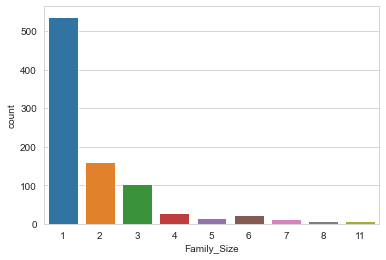

In [151]:
sns.countplot('Family_Size', data=family_df)

In [152]:
family_df['Single_Family'] = family_df['Family_Size'].map(lambda x : 1 if x==1 else 0)
family_df['Small_Family'] = family_df['Family_Size'].map(lambda x : 1 if 2 <= x <= 4 else 0)
family_df['Large_Family'] = family_df['Family_Size'].map(lambda x : 1 if 5 <= x else 0)

family_df.head()

,Family_Size,Single_Family,Small_Family,Large_Family
0,2,0,1,0
1,2,0,1,0
2,1,1,0,0
3,2,0,1,0
4,1,1,0,0


In [153]:

df=pd.concat([df,family_df],axis=1)
df.drop(['SibSp','Parch'],axis=1, inplace=True)
df.head()

,PassengerId,Survived,Sex,Age,Ticket,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,...,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,Family_Size,Single_Family,Small_Family,Large_Family
0,1,0,1,22.0,A/5 21171,7.2500,0,0,1,0,...,0,0,0,0,0,1,2,0,1,0
1,2,1,0,38.0,PC 17599,71.2833,1,0,0,1,...,0,0,0,0,0,0,2,0,1,0
2,3,1,0,26.0,STON/O2. 3101282,7.9250,0,0,1,0,...,0,0,0,0,0,1,1,1,0,0
3,4,1,0,35.0,113803,53.1000,1,0,0,0,...,0,0,0,0,0,0,2,0,1,0
4,5,0,1,35.0,373450,8.0500,0,0,1,0,...,0,0,0,0,0,1,1,1,0,0


In [154]:
df.shape

(891, 31)

In [155]:
df.corr()

,PassengerId,Survived,Sex,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,...,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,Family_Size,Single_Family,Small_Family,Large_Family
PassengerId,1.000000,-0.005007,0.042939,0.033207,0.012658,0.034303,-0.000086,-0.029486,-0.001205,-0.033606,...,0.022828,0.042351,-0.035772,-0.060049,-0.013814,-0.019919,-0.040143,0.057462,-0.028976,-0.057055
Survived,-0.005007,1.000000,-0.543351,-0.069809,0.257307,0.285904,0.093349,-0.322308,0.168240,0.003650,...,0.150716,0.145321,0.057935,0.016040,-0.026456,-0.316912,0.016639,-0.203367,0.279855,-0.125147
Sex,0.042939,-0.543351,1.000000,0.084153,-0.182333,-0.098013,-0.064746,0.137143,-0.082853,-0.074115,...,-0.079248,-0.047003,-0.008202,-0.091031,0.024728,0.140391,-0.200988,0.303646,-0.260747,-0.102954
Age,0.033207,-0.069809,0.084153,1.000000,0.091566,0.319916,0.006589,-0.281004,0.032024,-0.013855,...,0.132319,0.117211,-0.077209,-0.077253,0.039469,-0.233123,-0.248512,0.179775,-0.076160,-0.205243
Fare,0.012658,0.257307,-0.182333,0.091566,1.000000,0.591711,-0.118557,-0.413333,0.269335,-0.117216,...,0.098878,0.053717,-0.033093,-0.025180,0.002224,-0.482075,0.217138,-0.271832,0.205527,0.143636
Pclass_1,0.034303,0.285904,-0.098013,0.319916,0.591711,1.000000,-0.288585,-0.626738,0.296423,-0.155342,...,0.291218,0.242675,-0.068833,-0.037988,0.059256,-0.788773,-0.046114,-0.113364,0.168568,-0.092945
Pclass_2,-0.000086,0.093349,-0.064746,0.006589,-0.118557,-0.288585,1.000000,-0.565210,-0.125416,-0.127301,...,-0.041325,-0.038864,0.122906,-0.034258,-0.017100,0.172413,-0.038594,-0.039070,0.104546,-0.117721
Pclass_3,-0.029486,-0.322308,0.137143,-0.281004,-0.413333,-0.626738,-0.565210,1.000000,-0.153329,0.237449,...,-0.217282,-0.177461,-0.040721,0.060612,-0.037138,0.539291,0.071142,0.129472,-0.230325,0.175890
Embarked_C,-0.001205,0.168240,-0.082853,0.032024,0.269335,0.296423,-0.125416,-0.153329,1.000000,-0.148258,...,0.102977,-0.015939,-0.034726,-0.032371,-0.016158,-0.208528,-0.046215,-0.095298,0.158586,-0.109274
Embarked_Q,-0.033606,0.003650,-0.074115,-0.013855,-0.117216,-0.155342,-0.127301,0.237449,-0.148258,1.000000,...,-0.060318,-0.037897,-0.004113,-0.020654,-0.010310,0.129572,-0.058592,0.086464,-0.087093,-0.005620


In [156]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

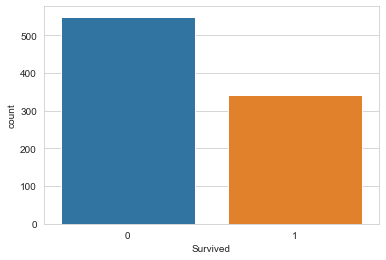

In [157]:
#Visualize the count of number of survivors
sns.countplot(df['Survived'],label="Count")

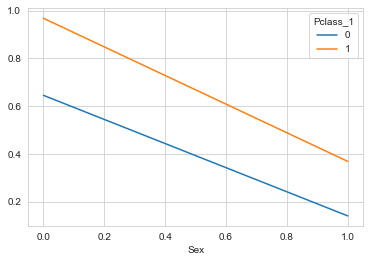

In [158]:
#Look at survival rate by sex and class visually
df.pivot_table('Survived', index='Sex', columns='Pclass_1').plot()

# Feature selection

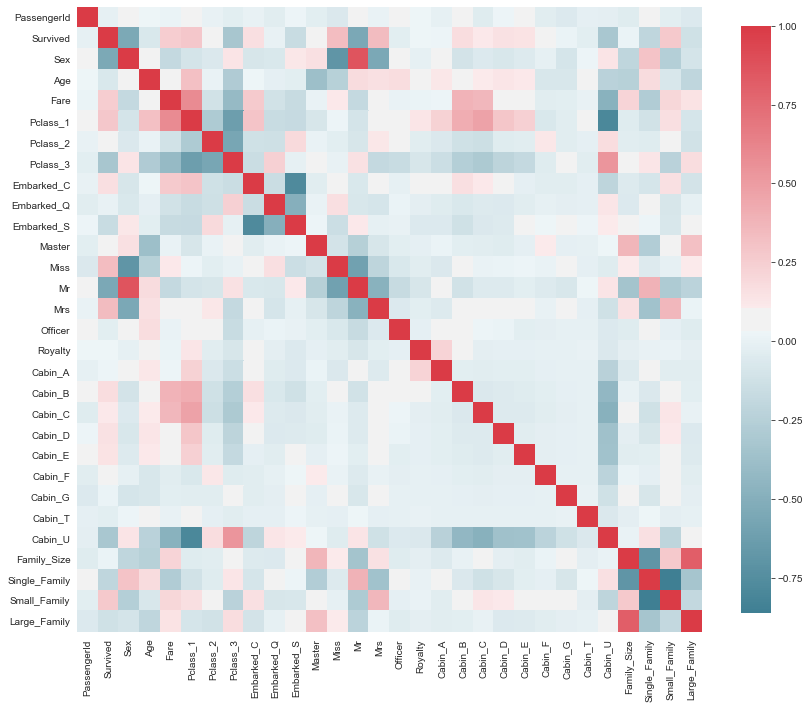

In [159]:
corr_df=df.corr()

plt.figure(figsize=(14,12))
colormap=sns.diverging_palette(220,10,as_cmap=True)
sns.heatmap(df.corr(),cmap=colormap,square=True,cbar_kws={'shrink':.9},linecolor='white')

In [160]:
corr_df['Survived'].sort_values(ascending=False)

Survived         1.000000
Mrs              0.344935
Miss             0.332795
Pclass_1         0.285904
Small_Family     0.279855
Fare             0.257307
Cabin_B          0.175095
Embarked_C       0.168240
Cabin_D          0.150716
Cabin_E          0.145321
Cabin_C          0.114652
Pclass_2         0.093349
Master           0.085221
Cabin_F          0.057935
Royalty          0.033391
Cabin_A          0.022287
Family_Size      0.016639
Cabin_G          0.016040
Embarked_Q       0.003650
PassengerId     -0.005007
Cabin_T         -0.026456
Officer         -0.031316
Age             -0.069809
Large_Family    -0.125147
Embarked_S      -0.155660
Single_Family   -0.203367
Cabin_U         -0.316912
Pclass_3        -0.322308
Sex             -0.543351
Mr              -0.549199
Name: Survived, dtype: float64

In [161]:
df_new=pd.concat([title_df,pclass_df,family_df,df['Fare'],cabin_df,embarked_df,df['Sex']],axis=1)
df_new.head()


,Master,Miss,Mr,Mrs,Officer,Royalty,Pclass_1,Pclass_2,Pclass_3,Family_Size,...,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,Embarked_C,Embarked_Q,Embarked_S,Sex
0,0,0,1,0,0,0,0,0,1,2,...,0,0,0,0,0,1,0,0,1,1
1,0,0,0,1,0,0,1,0,0,2,...,0,0,0,0,0,0,1,0,0,0
2,0,1,0,0,0,0,0,0,1,1,...,0,0,0,0,0,1,0,0,1,0
3,0,0,0,1,0,0,1,0,0,2,...,0,0,0,0,0,0,0,0,1,0
4,0,0,1,0,0,0,0,0,1,1,...,0,0,0,0,0,1,0,0,1,1


In [162]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Master         891 non-null    uint8  
 1   Miss           891 non-null    uint8  
 2   Mr             891 non-null    uint8  
 3   Mrs            891 non-null    uint8  
 4   Officer        891 non-null    uint8  
 5   Royalty        891 non-null    uint8  
 6   Pclass_1       891 non-null    uint8  
 7   Pclass_2       891 non-null    uint8  
 8   Pclass_3       891 non-null    uint8  
 9   Family_Size    891 non-null    int64  
 10  Single_Family  891 non-null    int64  
 11  Small_Family   891 non-null    int64  
 12  Large_Family   891 non-null    int64  
 13  Fare           891 non-null    float64
 14  Cabin_A        891 non-null    uint8  
 15  Cabin_B        891 non-null    uint8  
 16  Cabin_C        891 non-null    uint8  
 17  Cabin_D        891 non-null    uint8  
 18  Cabin_E   

In [163]:
X = df_new.loc[0:891-1,:]

y = df.loc[0:891-1,'Survived']

In [164]:
pred_X = df_new.loc[891:,:]

# setup Train_test_split

In [165]:
from sklearn.model_selection import train_test_split

In [166]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8,random_state=1)

# Model testing

In [167]:
#Create a function within many Machine Learning Models
def models(x_train,y_train):
  
  #Using Logistic Regression Algorithm to the Training Set
    from sklearn.linear_model import LogisticRegression
    log = LogisticRegression(random_state = 0)
    log.fit(x_train, y_train)
  
  #Using KNeighborsClassifier Method of neighbors class to use Nearest Neighbor algorithm
    from sklearn.neighbors import KNeighborsClassifier
    knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
    knn.fit(x_train, y_train)

  #Using SVC method of svm class to use Support Vector Machine Algorithm
    from sklearn.svm import SVC
    svc_lin = SVC(kernel = 'linear', random_state = 0)
    svc_lin.fit(x_train, y_train)

  #Using SVC method of svm class to use Kernel SVM Algorithm
    from sklearn.svm import SVC
    svc_rbf = SVC(kernel = 'rbf', random_state = 0)
    svc_rbf.fit(x_train, y_train)

  #Using GaussianNB method of naïve_bayes class to use Naïve Bayes Algorithm
    from sklearn.naive_bayes import GaussianNB
    gauss = GaussianNB()
    gauss.fit(x_train, y_train)

  #Using DecisionTreeClassifier of tree class to use Decision Tree Algorithm
    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
    tree.fit(x_train, y_train)

  #Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm
    from sklearn.ensemble import RandomForestClassifier
    forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
    forest.fit(x_train, y_train)
  
  #print model accuracy on the training data.
    print('[0]Logistic Regression Training Accuracy:', log.score(x_train, y_train))
    print('[1]K Nearest Neighbor Training Accuracy:', knn.score(x_train, y_train))
    print('[2]Support Vector Machine (Linear Classifier) Training Accuracy:', svc_lin.score(x_train, y_train))
    print('[3]Support Vector Machine (RBF Classifier) Training Accuracy:', svc_rbf.score(x_train, y_train))
    print('[4]Gaussian Naive Bayes Training Accuracy:', gauss.score(x_train, y_train))
    print('[5]Decision Tree Classifier Training Accuracy:', tree.score(x_train, y_train))
    print('[6]Random Forest Classifier Training Accuracy:', forest.score(x_train, y_train))
  
    return log, knn, svc_lin, svc_rbf, gauss, tree, forest


In [168]:
#Get and train all of the models
model = models(X_train,y_train)

[0]Logistic Regression Training Accuracy: 0.8820224719101124
[1]K Nearest Neighbor Training Accuracy: 0.8202247191011236
[2]Support Vector Machine (Linear Classifier) Training Accuracy: 0.8539325842696629
[3]Support Vector Machine (RBF Classifier) Training Accuracy: 0.7303370786516854
[4]Gaussian Naive Bayes Training Accuracy: 0.8314606741573034
[5]Decision Tree Classifier Training Accuracy: 0.949438202247191
[6]Random Forest Classifier Training Accuracy: 0.9382022471910112


In [176]:
for i in range(len(model)):
    cm = confusion_matrix(y_test, model[i].predict(X_test)) 
    #extracting TN, FP, FN, TP
    TN, FP, FN, TP = confusion_matrix(y_test, model[i].predict(X_test)).ravel()
    print(cm)
    print('Model[{}] Testing Accuracy = "{} !"'.format(i,  (TP + TN) / (TP + TN + FN + FP)))
    print()# Print a new line

[[389  43]
 [ 91 190]]
Model[0] Testing Accuracy = "0.8120617110799438 !"

[[363  69]
 [122 159]]
Model[1] Testing Accuracy = "0.7321178120617111 !"

[[374  58]
 [ 67 214]]
Model[2] Testing Accuracy = "0.8246844319775596 !"

[[395  37]
 [201  80]]
Model[3] Testing Accuracy = "0.6661991584852734 !"

[[376  56]
 [117 164]]
Model[4] Testing Accuracy = "0.7573632538569425 !"

[[376  56]
 [120 161]]
Model[5] Testing Accuracy = "0.7531556802244039 !"

[[381  51]
 [103 178]]
Model[6] Testing Accuracy = "0.7840112201963534 !"



In [178]:
#Print Prediction of Random Forest Classifier model
pred = model[6].predict(X_test)
print(pred)

#Print a space
print()

#Print the actual values
print(y_test)

[1 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 1 0 0 1 1 0 0 1
 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0
 1 0 1 0 0 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 1
 0 0 0 0 0 0 1 1 1 1 1 0 0 0 1 1 0 0 0 0 0 1 0 1 1 1 0 0 0 1 0 0 1 0 1 0 0
 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1
 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0
 0 0 0 0 1 1 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1 1 1 1 0 0 0 1 1 0 1 1 0
 0 1 0 0 1 0 0 1 1 1 1 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1
 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 1 1 1 1 1 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0
 1 1 1 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 1 1 1 1 0 0 0 0 1 1 0 0 0
 0 1 0 0 1 0 0 1 0 1 0 1 1 1 0 0 0 0 1 0 0 0 1 0 0 1 0 1 1 1 0 0 1 0 0 0 1
 0 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0
 0 0 1 1 0 0 1 0 0 1 1 0 

# GRIDSEARCHCV

In [169]:
from sklearn.model_selection import GridSearchCV
param_grid={'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.01,0.001,0.0001]}
grid=GridSearchCV(SVC(),param_grid,verbose=3)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.639, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.667, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.667, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.657, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.657, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.639, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] .................. C=0.1, gamma=0.001, score=0.639, total=   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] .................. C=0.1, gamma=0.001, score=0.694, total=   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] .................. C=0.1, gamma=0.001, score=0.639, total=   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] .................. C=0.1, gamma=0.001, score=0.657, total=   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] .................. C=0.1, gamma=0.001, score=0.657, total=   0.0s
[CV] C=0.1, gamma=0.0001 .............................................
[CV] ................. C=0.1, gamma=0.0001, score=0.639, total=   0.0s
[CV] C=0.1, gamma=0.0001 .............................................
[CV] ................. C=0.1, gamma=0.0001, score=0.667, total=   0.0s
[CV] C=0.1, gamma=0.0001 .............................................
[CV] .

[CV] .................. C=10, gamma=0.0001, score=0.657, total=   0.0s
[CV] C=10, gamma=0.0001 ..............................................
[CV] .................. C=10, gamma=0.0001, score=0.829, total=   0.0s
[CV] C=100, gamma=1 ..................................................
[CV] ...................... C=100, gamma=1, score=0.722, total=   0.0s
[CV] C=100, gamma=1 ..................................................
[CV] ...................... C=100, gamma=1, score=0.722, total=   0.0s
[CV] C=100, gamma=1 ..................................................
[CV] ...................... C=100, gamma=1, score=0.694, total=   0.0s
[CV] C=100, gamma=1 ..................................................
[CV] ...................... C=100, gamma=1, score=0.657, total=   0.0s
[CV] C=100, gamma=1 ..................................................
[CV] ...................... C=100, gamma=1, score=0.629, total=   0.0s
[CV] C=100, gamma=0.1 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    1.3s finished


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             verbose=3)

In [170]:
grid.best_params_

{'C': 100, 'gamma': 0.001}

In [171]:
grid.best_estimator_

SVC(C=100, gamma=0.001)

In [172]:
grid_prediction=grid.predict(X_test)

In [173]:
print(confusion_matrix(y_test,grid_prediction))
print(classification_report(y_test,grid_prediction))

[[383  49]
 [109 172]]
              precision    recall  f1-score   support

           0       0.78      0.89      0.83       432
           1       0.78      0.61      0.69       281

    accuracy                           0.78       713
   macro avg       0.78      0.75      0.76       713
weighted avg       0.78      0.78      0.77       713



In [180]:
df_new.head()

,Master,Miss,Mr,Mrs,Officer,Royalty,Pclass_1,Pclass_2,Pclass_3,Family_Size,...,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,Embarked_C,Embarked_Q,Embarked_S,Sex
0,0,0,1,0,0,0,0,0,1,2,...,0,0,0,0,0,1,0,0,1,1
1,0,0,0,1,0,0,1,0,0,2,...,0,0,0,0,0,0,1,0,0,0
2,0,1,0,0,0,0,0,0,1,1,...,0,0,0,0,0,1,0,0,1,0
3,0,0,0,1,0,0,1,0,0,2,...,0,0,0,0,0,0,0,0,1,0
4,0,0,1,0,0,0,0,0,1,1,...,0,0,0,0,0,1,0,0,1,1


In [183]:
my_survival = [[0,1,0,0, 0, 0, 1,0,1,0,0, 0, 0, 1,0,1,0,0, 0, 0, 1,0,1,2,1,1,1]]
#Print Prediction of Random Forest Classifier model
pred = model[6].predict(my_survival)
print(pred)

if pred == 0:
    print(" You didn't make it")
else:
    print('You survived')

[0]
 You didn't make it
